<a href="https://colab.research.google.com/github/vprobon/iLIR-ML-data/blob/main/iLIR_AF2disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -rf sample_data

In [4]:
import csv
import ast # Use ast.literal_eval for safe evaluation of the JSON-like string

def read_results_file(file_path):
    results_dict = {}
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for row in reader:
            uniprot_id = row[0]
            scores_json = row[1]
            try:
                # Safely evaluate the JSON-like string to a Python dictionary
                scores_data = ast.literal_eval(scores_json)
                scores = scores_data.get('scores', [])
                results_dict[uniprot_id] = scores
            except (ValueError, SyntaxError):
                print(f"Failed to decode JSON for UniProt ID: {uniprot_id}")
    return results_dict

# Example usage
output_file = 'alphafold_disorder_predictions.csv'
results_dict = read_results_file(output_file)

# Print the results dictionary
#for uniprot_id, scores in results_dict.items():
#    print(f"{uniprot_id}: {scores}")


In [5]:
import pandas as pd

df = pd.read_csv('LIRcentral-OnlyVerified-Canonical.csv', delimiter='\t')

In [6]:
df.head()

,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,(-2)LIR PSSM score,ExperimentallyVerified(FunctionalYES/NO),Ref.
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,10,accessory LIR,Ref.
1,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,TGKDKLIVDE,FEEL,GEQESDIDEF,16,19,16,accessory LIR,Ref.
2,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,CVKFDDTIDD,FVTI,EKDELFDVPD,435,438,19,accessory LIR,Ref.
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,23,accessory LIR,Ref.
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,9,NO,Ref.


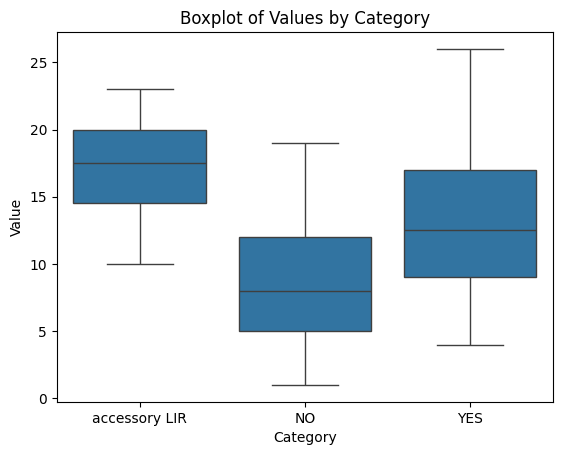

                                          count       mean       std   min  \
ExperimentallyVerified(FunctionalYES/NO)                                     
NO                                         79.0   8.569620  4.214394   1.0   
YES                                       166.0  13.018072  5.162185   4.0   
accessory LIR                               4.0  17.000000  5.477226  10.0   

                                           25%   50%   75%   max  
ExperimentallyVerified(FunctionalYES/NO)                          
NO                                         5.0   8.0  12.0  19.0  
YES                                        9.0  12.5  17.0  26.0  
accessory LIR                             14.5  17.5  20.0  23.0  


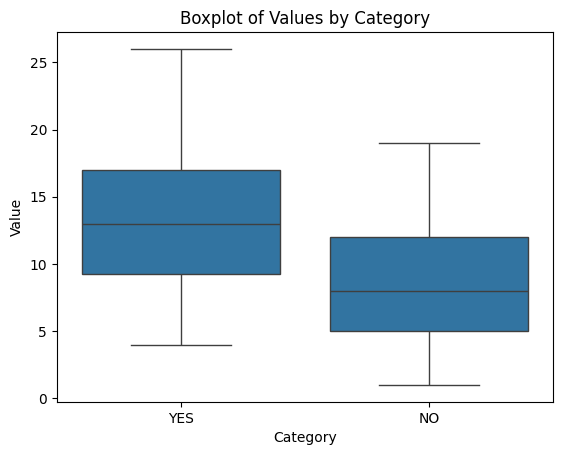

                  count       mean       std  min   25%   50%   75%   max
Grouped_Verified                                                         
NO                 79.0   8.569620  4.214394  1.0  5.00   8.0  12.0  19.0
YES               170.0  13.111765  5.188105  4.0  9.25  13.0  17.0  26.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the boxplot
sns.boxplot(x='ExperimentallyVerified(FunctionalYES/NO)', y='(-2)LIR PSSM score', data=df)

# Customize the plot (optional)
plt.title('Boxplot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()

# Compute summary statistics
summary_stats = df.groupby('ExperimentallyVerified(FunctionalYES/NO)')['(-2)LIR PSSM score'].describe()

# Print summary statistics
print(summary_stats)

df['Grouped_Verified'] = df['ExperimentallyVerified(FunctionalYES/NO)'].replace({'YES': 'YES', 'accessory LIR': 'YES', 'NO': 'NO'})

# Create the boxplot
sns.boxplot(x='Grouped_Verified', y='(-2)LIR PSSM score', data=df)

# Customize the plot (optional)
plt.title('Boxplot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()

# Compute summary statistics
summary_stats = df.groupby('Grouped_Verified')['(-2)LIR PSSM score'].describe()

# Print summary statistics
print(summary_stats)

In [8]:
# Statistical comparisons

from scipy.stats import f_oneway

# Sample DataFrame


# Perform ANOVA
categories = df['ExperimentallyVerified(FunctionalYES/NO)'].unique()
groups = [df['(-2)LIR PSSM score'][df['ExperimentallyVerified(FunctionalYES/NO)'] == category] for category in categories]
anova_result = f_oneway(*groups)

print("ANOVA result:")
print(anova_result)

from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test
kruskal_result = kruskal(*groups)

print("Kruskal-Wallis H-test result:")
print(kruskal_result)

ANOVA result:
F_onewayResult(statistic=24.604619330721363, pvalue=1.8156618597284897e-10)
Kruskal-Wallis H-test result:
KruskalResult(statistic=40.0163368095336, pvalue=2.0443858615256196e-09)


In [9]:
!pip install scikit_posthocs

In [10]:
import pandas as pd
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

cat_label='ExperimentallyVerified(FunctionalYES/NO)'
val_label='(-2)LIR PSSM score'

# Perform ANOVA
categories = df[cat_label].unique()
groups = [df[val_label][df[cat_label] == category] for category in categories]
anova_result = f_oneway(*groups)
print("ANOVA result:")
print(anova_result)

# Perform Tukey's HSD test if ANOVA is significant
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(endog=df[val_label], groups=df[cat_label], alpha=0.05)
    print("\nTukey's HSD test result:")
    print(tukey_result)

# Perform Kruskal-Wallis H-test
kruskal_result = kruskal(*groups)
print("\nKruskal-Wallis H-test result:")
print(kruskal_result)

# If Kruskal-Wallis is significant, perform Dunn's post-hoc test
if kruskal_result.pvalue < 0.05:
    dunn_result = posthoc_dunn(df, val_col=val_label, group_col=cat_label, p_adjust='bonferroni')
    print("\nDunn's post-hoc test result with Bonferroni correction:")
    print(dunn_result)


ANOVA result:
F_onewayResult(statistic=24.604619330721363, pvalue=1.8156618597284897e-10)

Tukey's HSD test result:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
    NO           YES   4.4485    0.0  2.8738  6.0231   True
    NO accessory LIR   8.4304 0.0025   2.526 14.3348   True
   YES accessory LIR   3.9819  0.243 -1.8474  9.8113  False
-----------------------------------------------------------

Kruskal-Wallis H-test result:
KruskalResult(statistic=40.0163368095336, pvalue=2.0443858615256196e-09)

Dunn's post-hoc test result with Bonferroni correction:
                         NO           YES  accessory LIR
NO             1.000000e+00  4.227433e-09       0.011304
YES            4.227433e-09  1.000000e+00       0.582085
accessory LIR  1.130419e-02  5.820851e-01       1.000000


In [11]:
df.head()


,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,(-2)LIR PSSM score,ExperimentallyVerified(FunctionalYES/NO),Ref.,Grouped_Verified
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,10,accessory LIR,Ref.,YES
1,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,TGKDKLIVDE,FEEL,GEQESDIDEF,16,19,16,accessory LIR,Ref.,YES
2,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,CVKFDDTIDD,FVTI,EKDELFDVPD,435,438,19,accessory LIR,Ref.,YES
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,23,accessory LIR,Ref.,YES
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,9,NO,Ref.,NO


In [12]:
from statistics import mean
df['AF2-disorder-scores-core']=None
df['AF2-disorder-avgscores-core']=None

df['AF2-disorder-scores-upstream']=None
df['AF2-disorder-avgscores-upstream']=None

df['AF2-disorder-scores-downstream']=None
df['AF2-disorder-avgscores-downstream']=None

window_len =  20
# Iterate through each row in df
for index, row in df.iterrows():
    uniprot_acc = row['UNIPROT ACC']
    start_pos = row['Start position'] - 1  # Python indexing adjustment
    end_pos = row['End position'] - 1      # Python indexing adjustment

    if uniprot_acc in results_dict:
        values_list_core = results_dict[uniprot_acc][start_pos:end_pos+1]
        df.at[index, 'AF2-disorder-scores-core'] = values_list_core
        df.at[index, 'AF2-disorder-avgscores-core'] = mean(values_list_core)

        start_pos_up = max(0,start_pos-window_len)
        end_pos_up = max(0,start_pos-1)
        values_list_up = results_dict[uniprot_acc][start_pos_up:end_pos_up+1]
        df.at[index, 'AF2-disorder-scores-upstream'] = values_list_up
        df.at[index, 'AF2-disorder-avgscores-upstream'] = mean(values_list_up)

        start_pos_down = min(end_pos+1, len(results_dict[uniprot_acc])-1)
        end_pos_down = min(end_pos+window_len, len(results_dict[uniprot_acc])-1)
        values_list_down = results_dict[uniprot_acc][start_pos_down:end_pos_down+1]
        df.at[index, 'AF2-disorder-scores-downstream'] = values_list_down
        df.at[index, 'AF2-disorder-avgscores-downstream'] = mean(values_list_down)

df.head()

,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,(-2)LIR PSSM score,ExperimentallyVerified(FunctionalYES/NO),Ref.,Grouped_Verified,AF2-disorder-scores-core,AF2-disorder-avgscores-core,AF2-disorder-scores-upstream,AF2-disorder-avgscores-upstream,AF2-disorder-scores-downstream,AF2-disorder-avgscores-downstream
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,10,accessory LIR,Ref.,YES,"[0.868, 0.868, 0.871, 0.875]",0.8705,"[0.845, 0.848, 0.847, 0.848, 0.851, 0.855, 0.8...",0.85515,"[0.875, 0.875, 0.876, 0.882, 0.876, 0.872, 0.8...",0.88045
1,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,TGKDKLIVDE,FEEL,GEQESDIDEF,16,19,16,accessory LIR,Ref.,YES,None,None,None,None,None,None
2,Legionella pneumophila subsp. pneumophila (str...,Q5ZUV9,RAVZ_LEGPH,Cysteine protease RavZ,F LIR,CVKFDDTIDD,FVTI,EKDELFDVPD,435,438,19,accessory LIR,Ref.,YES,None,None,None,None,None,None
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,23,accessory LIR,Ref.,YES,"[0.83, 0.842, 0.834, 0.835]",0.83525,"[0.852, 0.852, 0.854, 0.856, 0.85, 0.848, 0.85...",0.83805,"[0.837, 0.84, 0.834, 0.833, 0.826, 0.83, 0.834...",0.8479
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,9,NO,Ref.,NO,"[0.82, 0.812, 0.804, 0.803]",0.80975,"[0.822, 0.823, 0.825, 0.828, 0.836, 0.837, 0.8...",0.84905,"[0.79, 0.79, 0.787, 0.787, 0.789, 0.787, 0.791...",0.75815



Analysis for (-2)LIR PSSM score:
Normality test p-values: [0.23292693495750427, 0.0015143747441470623], All normal: False
Levene's test p-value: 0.009631707476979189, Homogeneity of variances: False
Kruskal-Wallis: H-statistic = 28.17831159422903, p-value = 1.1063739374880276e-07
               NO           YES
NO   1.000000e+00  1.106374e-07
YES  1.106374e-07  1.000000e+00

Analysis for AF2-disorder-avgscores-core:
Normality test p-values: [0.0027224922087043524, 2.7041417993700634e-09], All normal: False
Levene's test p-value: 0.0010788901743175768, Homogeneity of variances: False
Kruskal-Wallis: H-statistic = 8.707958821293758, p-value = 0.0031682375697659106
           NO       YES
NO   1.000000  0.003168
YES  0.003168  1.000000

Analysis for AF2-disorder-avgscores-upstream:
Normality test p-values: [6.535110878758132e-05, 3.688638561261115e-10], All normal: False
Levene's test p-value: 0.00017182195269646505, Homogeneity of variances: False
Kruskal-Wallis: H-statistic = 8.5531737

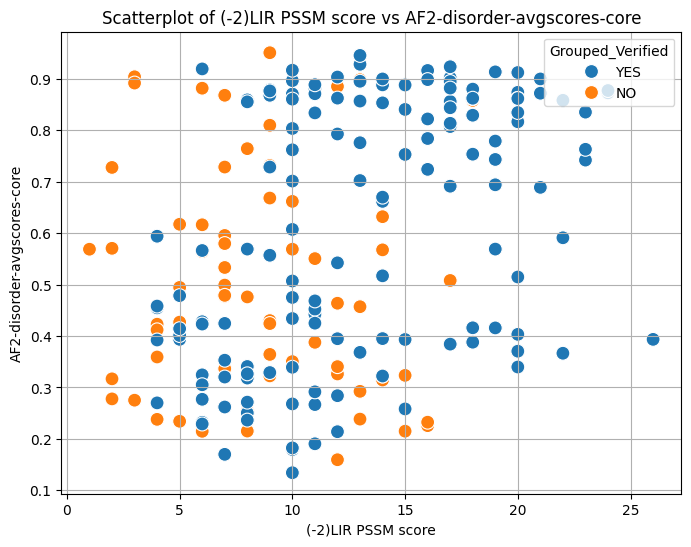

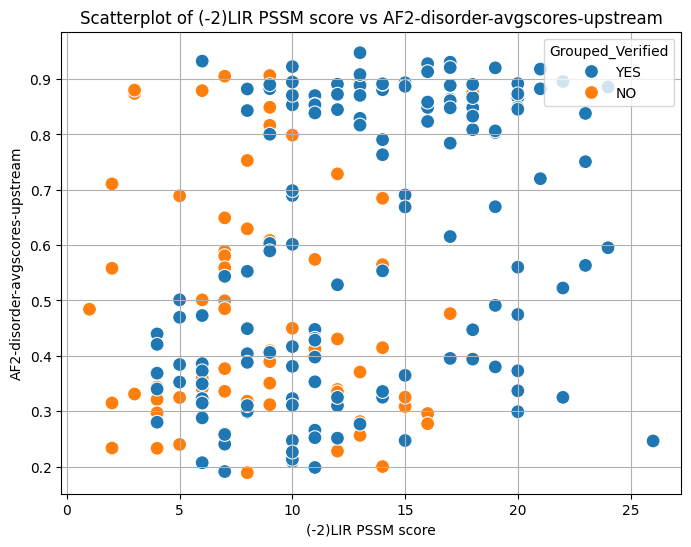

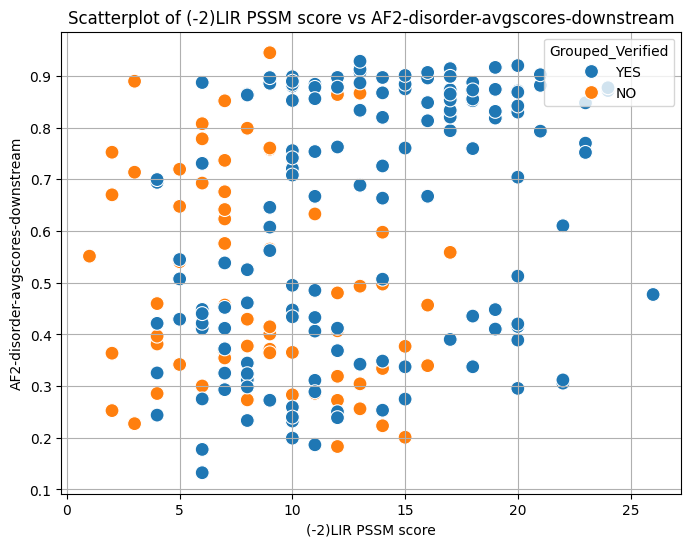

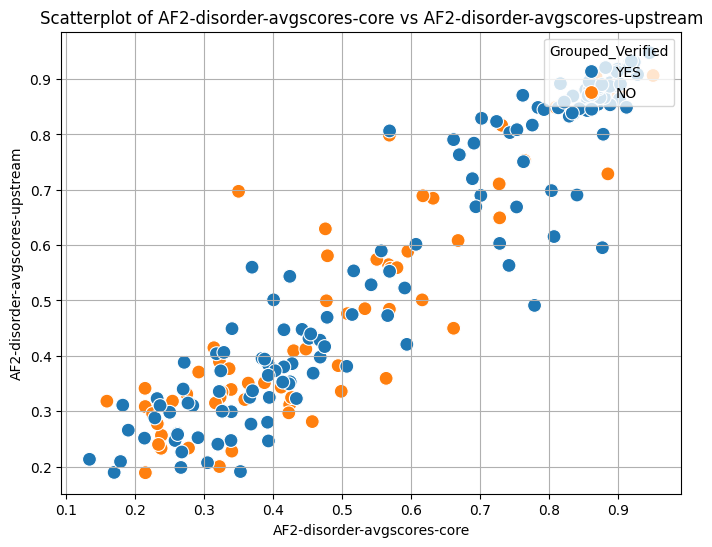

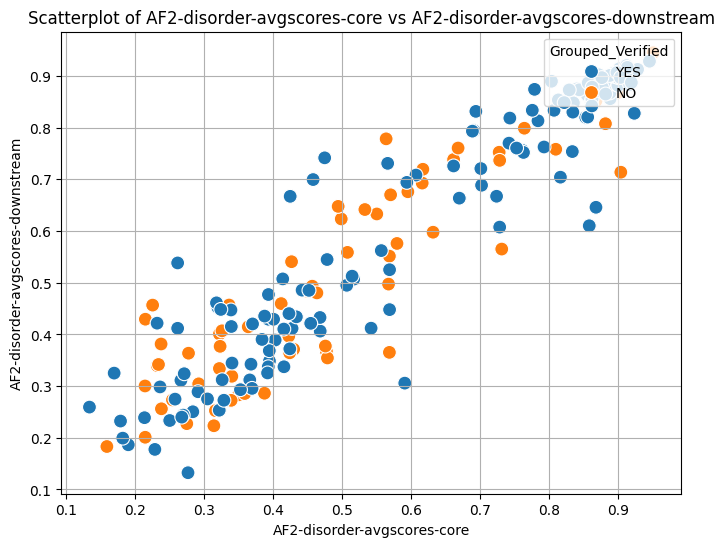

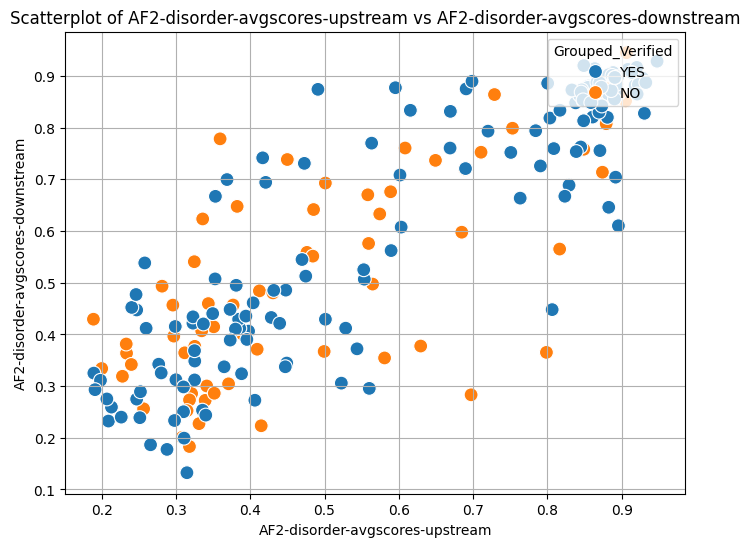

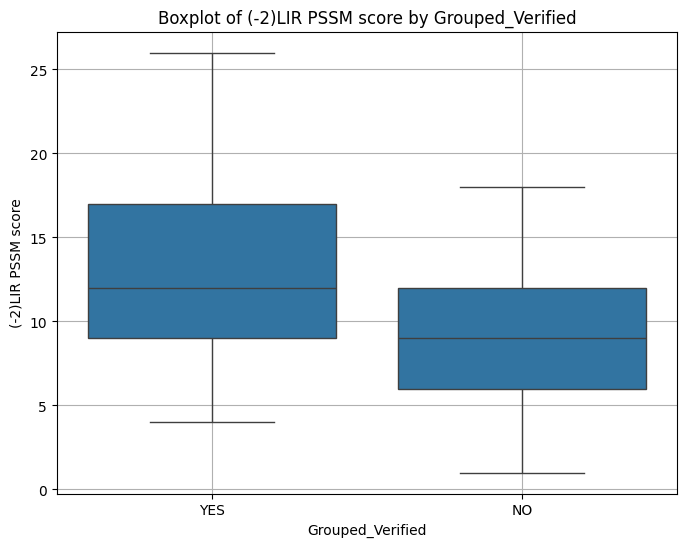

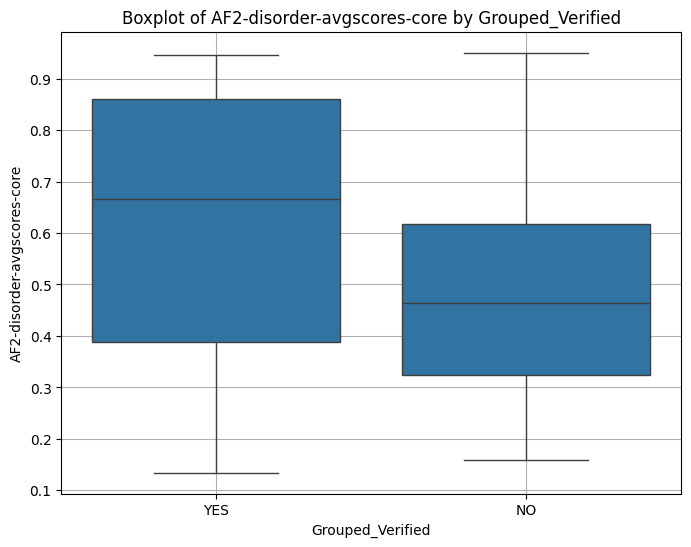

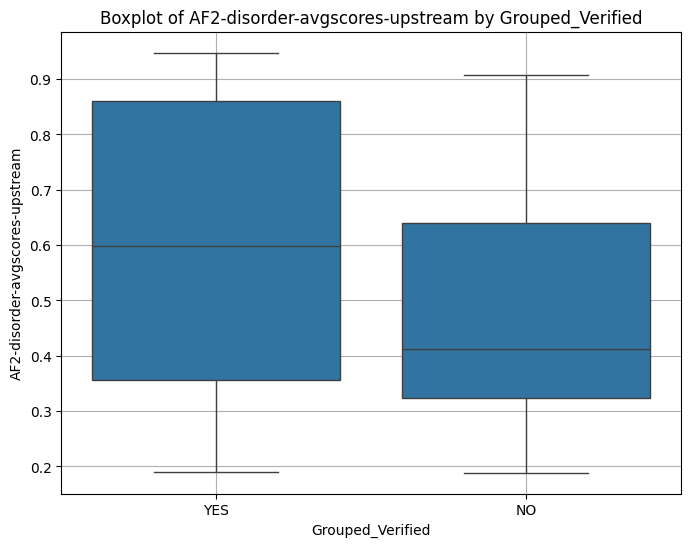

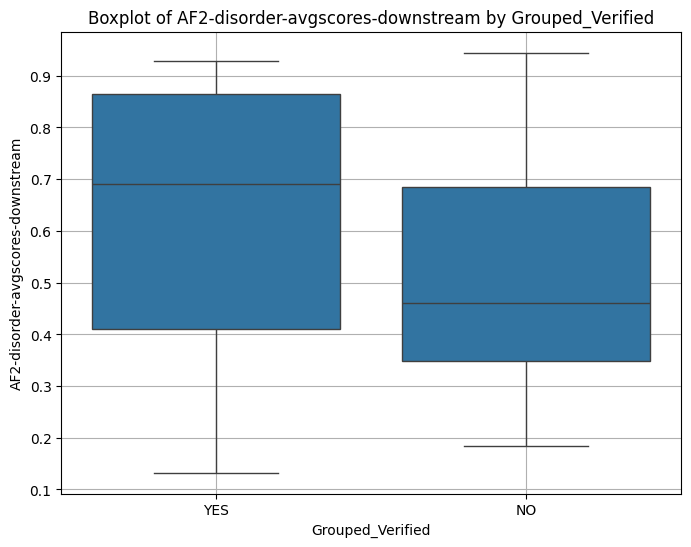

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

df.dropna(subset=['AF2-disorder-avgscores-core'], inplace=True)

# Function to test normality and homogeneity of variances, and then perform appropriate test
def perform_tests(df, numerical_columns, categorical_column):
    for column in numerical_columns:
        print(f"\nAnalysis for {column}:")

        # Group the data by categorical column
        groups = [group[column].values for name, group in df.groupby(categorical_column)]

        # Shapiro-Wilk test for normality
        normality_p_values = [shapiro(group)[1] for group in groups]
        normality = all(p > 0.05 for p in normality_p_values)
        print(f"Normality test p-values: {normality_p_values}, All normal: {normality}")

        # Levene's test for homogeneity of variances
        levene_p_value = levene(*groups)[1]
        homogeneity = levene_p_value > 0.05
        print(f"Levene's test p-value: {levene_p_value}, Homogeneity of variances: {homogeneity}")

        if normality and homogeneity:
            # Perform ANOVA
            f_statistic, p_value = f_oneway(*groups)
            print(f"ANOVA: F-statistic = {f_statistic}, p-value = {p_value}")

            # Post-hoc test (Tukey's HSD)
            if p_value < 0.05:
                tukey_result = pairwise_tukeyhsd(df[column], df[categorical_column])
                print(tukey_result)
        else:
            # Perform Kruskal-Wallis
            h_statistic, p_value = kruskal(*groups)
            print(f"Kruskal-Wallis: H-statistic = {h_statistic}, p-value = {p_value}")

            # Post-hoc test (Dunn's test)
            if p_value < 0.05:
                dunn_result = sp.posthoc_dunn(df, val_col=column, group_col=categorical_column, p_adjust='bonferroni')
                print(dunn_result)

# Specify the numerical columns and the categorical column
numerical_columns = ['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
                     'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream']
categorical_column = 'Grouped_Verified'

# Perform the tests
perform_tests(df, numerical_columns, categorical_column)

# Plotting scatterplots
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], hue=categorical_column, data=df, s=100)
        plt.title(f'Scatterplot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.legend(title=categorical_column, loc='upper right')
        plt.grid(True)
        plt.show()

# Plotting boxplots
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_column, y=column, data=df)
    plt.title(f'Boxplot of {column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


# Now build/validate classifiers

In [14]:
df.columns

Index(['Species', 'UNIPROT ACC', 'UNIPROT ID', 'Protein name', 'Motif type',
       'Up-stream', 'Motif', 'Down-stream', 'Start position', 'End position',
       '(-2)LIR PSSM score', 'ExperimentallyVerified(FunctionalYES/NO)',
       'Ref.', 'Grouped_Verified', 'AF2-disorder-scores-core',
       'AF2-disorder-avgscores-core', 'AF2-disorder-scores-upstream',
       'AF2-disorder-avgscores-upstream', 'AF2-disorder-scores-downstream',
       'AF2-disorder-avgscores-downstream'],
      dtype='object')

In [15]:
# Separate features (X) and target variable (y)
# X = df.drop(columns=['target_column_name'])
# y = df['target_column_name']

df_forclass = df[['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
       'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream', 'Grouped_Verified']]
X = df_forclass.drop(columns=['Grouped_Verified'])
y = df_forclass['Grouped_Verified']

In [16]:
from sklearn.model_selection import train_test_split

# Example splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Example classifier initialization
classifier = RandomForestClassifier()

In [18]:
# Example training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Example making predictions
y_pred = classifier.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6511627906976745

Classification Report:
              precision    recall  f1-score   support

          NO       0.31      0.40      0.35        10
         YES       0.80      0.73      0.76        33

    accuracy                           0.65        43
   macro avg       0.55      0.56      0.55        43
weighted avg       0.69      0.65      0.67        43


Confusion Matrix:
[[ 4  6]
 [ 9 24]]


In [21]:
from sklearn.model_selection import GridSearchCV

# Grid search for parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(max_depth=None,min_samples_split=2, n_estimators=100)

# Example cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.68181818 0.72727273 0.63636364 0.66666667 0.85714286 0.76190476
 0.71428571 0.61904762 0.71428571 0.52380952]
Mean CV accuracy: 0.6902597402597402


In [23]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X)

In [24]:
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7209302325581395

Classification Report:
              precision    recall  f1-score   support

          NO       0.42      0.50      0.45        10
         YES       0.84      0.79      0.81        33

    accuracy                           0.72        43
   macro avg       0.63      0.64      0.63        43
weighted avg       0.74      0.72      0.73        43


Confusion Matrix:
[[ 5  5]
 [ 7 26]]


# Imbalanced Random Forrest

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [26]:
# Perform grid search for parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=BalancedRandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [27]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [28]:
classifier = BalancedRandomForestClassifier(max_depth=None,min_samples_split=2, n_estimators=300)

# Example cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=10)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/util

Cross-validation scores: [0.59090909 0.77272727 0.5        0.71428571 0.80952381 0.76190476
 0.76190476 0.47619048 0.57142857 0.42857143]
Mean CV accuracy: 0.6387445887445887


In [29]:
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.59090909 0.77272727 0.5        0.71428571 0.80952381 0.76190476
 0.76190476 0.47619048 0.57142857 0.42857143]
Mean CV accuracy: 0.6387445887445887


In [30]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [31]:
# Evaluating performance
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5116279069767442

Classification Report:
              precision    recall  f1-score   support

          NO       0.31      0.90      0.46        10
         YES       0.93      0.39      0.55        33

    accuracy                           0.51        43
   macro avg       0.62      0.65      0.51        43
weighted avg       0.78      0.51      0.53        43


Confusion Matrix:
[[ 9  1]
 [20 13]]


# Logistic regression classifier

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Encode the categorical variable
df['Grouped_Verified'] = df['Grouped_Verified'].astype('category').cat.codes

# Specify the feature columns and the target column
X = df[['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
        'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream']]
y = df['Grouped_Verified']


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 4  6]
 [ 8 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36        10
           1       0.81      0.76      0.78        33

    accuracy                           0.67        43
   macro avg       0.57      0.58      0.57        43
weighted avg       0.70      0.67      0.68        43



<Axes: xlabel='(-2)LIR PSSM score', ylabel='AF2-disorder-avgscores-core'>

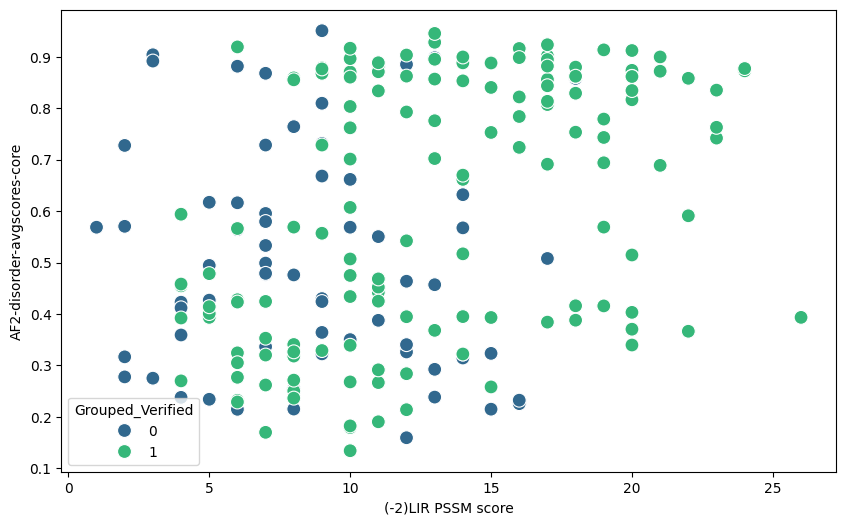

In [35]:
# Plotting decision boundaries (for visualization purposes, using first two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Grouped_Verified'], palette='viridis', s=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


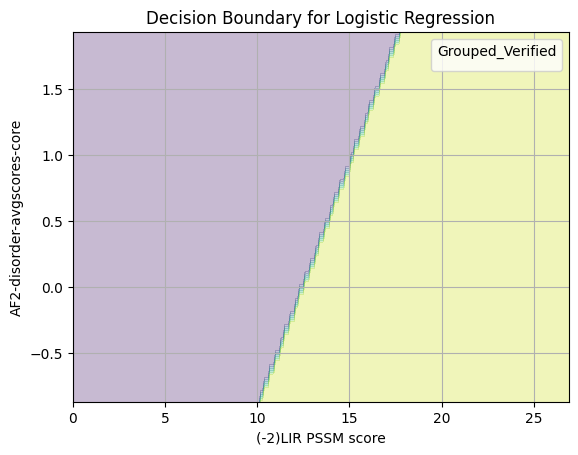

In [36]:
# Create a mesh grid for plotting decision boundary
import numpy as np
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = log_reg.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('Decision Boundary for Logistic Regression')
plt.xlabel('(-2)LIR PSSM score')
plt.ylabel('AF2-disorder-avgscores-core')
plt.legend(title='Grouped_Verified', loc='upper right')
plt.grid(True)
plt.show()

# Simple multi-layered perceptron

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Confusion Matrix:
[[ 5  5]
 [12 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.50      0.37        10
           1       0.81      0.64      0.71        33

    accuracy                           0.60        43
   macro avg       0.55      0.57      0.54        43
weighted avg       0.69      0.60      0.63        43



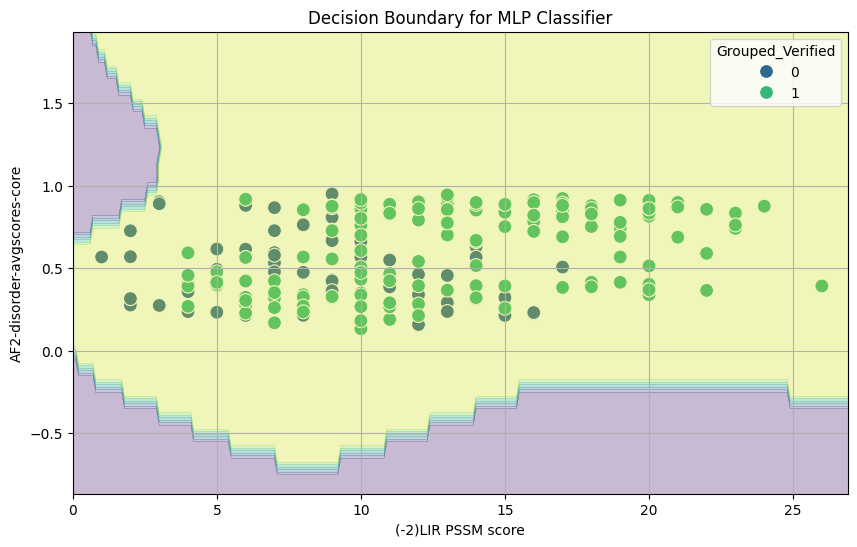

In [38]:
# Encode the categorical variable
df['Grouped_Verified'] = df['Grouped_Verified'].astype('category').cat.codes

# Specify the feature columns and the target column
X = df[['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
        'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream']]
y = df['Grouped_Verified']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPClassifier(max_iter=1000)

# Define the parameter grid for grid search
parameter_space = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform grid search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found:\n", clf.best_params_)

# Predict with the best estimator
y_pred = clf.best_estimator_.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization of decision boundaries (using first two features for 2D visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Grouped_Verified'], palette='viridis', s=100)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.best_estimator_.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('Decision Boundary for MLP Classifier')
plt.xlabel('(-2)LIR PSSM score')
plt.ylabel('AF2-disorder-avgscores-core')
plt.legend(title='Grouped_Verified', loc='upper right')
plt.grid(True)
plt.show()

# Generate PSI-BLAST PSSMs for the positive and negative examples - separate scores for Up-Core-Down-stream regions

# Then add PSSM-scores as descriptors

In [39]:
# LIRcentral PSSM files in Google Drive under LIR_development
!cp /content/drive/MyDrive/LIR_development/*pssm .
!ls -l .
!wc -l *pssm


total 620
-rw-r--r-- 1 root root 581304 Jun 17 02:02 alphafold_disorder_predictions.csv
drwx------ 6 root root   4096 Jun 17 02:01 drive
-rw-r--r-- 1 root root  30313 Jun 17 02:02 LIRcentral-OnlyVerified-Canonical.csv
-rw------- 1 root root   4335 Jun 17 02:20 negative.pssm
-rw------- 1 root root   4335 Jun 17 02:20 positive.pssm
  31 negative.pssm
  31 positive.pssm
  62 total


In [40]:
!head positive.pssm


Last position-specific scoring matrix computed, weighted observed percentages rounded down, information per position, and relative weight of gapless real matches to pseudocounts
           A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V   A   R   N   D   C   Q   E   G   H   I   L   K   M   F   P   S   T   W   Y   V
    1 G   -1  0  0  0  1  1  1 -1  0 -1  0 -1  1  0  1  1  0  2 -1 -1    2   6   3   4   3   6  10   5   3   2  12   2   3   6   7  13   4   3   2   4  0.07 0.11
    2 G    0 -1 -2  1 -4  1 -1  0  0 -1  0  0  2 -2  2  1 -2 -4  0  0    8   3   1   8   0   6   3   6   3   3  10   7   6   2  11  11   1   0   4   7  0.12 0.15
    3 S   -1  0  1  0 -3  0  1  0  1 -1  0  0  0  0  0  1  0 -3 -1 -1    3   6   7   6   0   5   8   6   4   3  10   4   2   4   5  12   8   0   2   5  0.06 0.08
    4 S    0  0  1  0 -1  0  0  0 -2 -1 -1  0 -1  0  1  1  0  0  0  0   10   7   7   5   1   3   6   6   0   4   7   3   1   5   8  13   4   1   3   5  0.06 0.08
    5 G    0  0 -1  1  

In [41]:
import pandas as pd

c= [(9,12),(12,15),(15,18),(18,21),(21,24),(24,27),(27,30),(30,33),(33,36),(36,39),(39,42),
            (42,45),(45,48),(48,51),(51,54),(54,57),(57,60),(60,63),(63,66), (66,69)
            ]

pssm_pos = pd.read_fwf('positive.pssm', colspecs=c, skiprows=2, skipfooter=4)
pssm_neg = pd.read_fwf('negative.pssm', colspecs=c, skiprows=2, skipfooter=4)


In [42]:
print('Positive PSSM')
print(pssm_pos)
print('Negative PSSM')
print(pssm_neg)
pssm_contrast=pssm_pos-pssm_neg
print('Contrast PSSM')
print(pssm_contrast)

Positive PSSM
    A  R  N   D  C  Q  E  G  H  I  L  K  M  F  P  S  T   W  Y  V
0  -1  0  0   0  1  1  1 -1  0 -1  0 -1  1  0  1  1  0   2 -1 -1
1   0 -1 -2   1 -4  1 -1  0  0 -1  0  0  2 -2  2  1 -2  -4  0  0
2  -1  0  1   0 -3  0  1  0  1 -1  0  0  0  0  0  1  0  -3 -1 -1
3   0  0  1   0 -1  0  0  0 -2 -1 -1  0 -1  0  1  1  0   0  0  0
4   0  0 -1   1  0  0  1  0  1 -2 -1  0  0 -1  1  1  0   0 -1 -1
5  -1  0 -1   2 -1  0  0  1 -1 -2 -2  1  1 -4  2  1  0   0  1 -2
6   0  0 -1   2  1  0  1 -1  1 -2  0 -1  0 -1  1  1  0  -4  1 -1
7  -1 -1  1   2 -1  0  1 -1  1 -2  0 -1 -3 -1  1  0  1   1 -1 -2
8  -1  1 -1   3  1  0  2 -2  0 -1 -1  1 -1 -2  0  1  0  -5 -1 -2
9  -1 -1  0   3  0 -1  2  1  0 -1 -2 -1  0 -1 -1  1  0  -4 -1 -2
10 -8 -8 -9 -10 -8 -8 -9 -9 -6 -7 -7 -9 -7  5 -9 -8 -8  10  6 -8
11 -1 -1  0   2  0  0  2 -1 -1  1  0  0 -2 -1  0 -1  0  -4 -1  1
12 -1  1  0  -1 -1  0  0 -2  0  1  1  0  2 -1 -1  0  0   0  1  0
13 -6 -7 -8  -8 -6 -7 -8 -8 -8  5  5 -7 -3 -5 -7 -7 -6  -7 -6  3
14 -1  1  0

In [ ]:
# df_forclass = df[['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
#        'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream', 'Grouped_Verified']]
# X = df_forclass.drop(columns=['Grouped_Verified'])
# y = df_forclass['Grouped_Verified']

In [44]:
AAlist = "A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V".split(" ")

def pssm_score(seq,pssm):
  '''
  This function can score sequences (partially) against a PSSM.
  Partial scoring can be achieved by padding sequence appropriately
  with characters not in the ammino acid alphabet
  '''
  score=0
  for i in range(0,len(seq)):
    # Silently skip unknown characters (with zero score)
    if seq[i] in AAlist:
      score += pssm[seq[i]][i]

  return(score)

def left_pad_sequence(seq, total_length=10, pad_char='X'):
    return seq.rjust(total_length, pad_char)

def right_pad_sequence(seq, total_length=10, pad_char='X'):
    return seq.ljust(total_length, pad_char)


In [82]:
df['PSSM_LIRcentral-core']=None
df['PSSM_LIRcentral-upstream']=None
df['PSSM_LIRcentral-downstream']=None
df['nPSSM_LIRcentral-core']=None
df['nPSSM_LIRcentral-upstream']=None
df['nPSSM_LIRcentral-downstream']=None


for index, row in df.iterrows():
    uniprot_acc = row['UNIPROT ACC']
    if(str(row['Up-stream']) == 'nan'):
      row['Up-stream'] = ""
    if(str(row['Down-stream']) == 'nan'):
      row['Down-stream'] = ""

    core_seq = row['Motif']
    core_seq = left_pad_sequence(core_seq, total_length=14)
    core_seq = right_pad_sequence(core_seq, total_length=24)

    df.at[index,'PSSM_LIRcentral-core'] = pssm_score(core_seq,pssm_pos)
    up_seq = left_pad_sequence(row['Up-stream'])
    up_seq = right_pad_sequence(up_seq, total_length=24)
    df.at[index,'PSSM_LIRcentral-upstream'] = pssm_score(up_seq,pssm_pos)
    down_seq = right_pad_sequence(row['Down-stream'])
    down_seq = left_pad_sequence(down_seq,total_length=24)
    df.at[index,'PSSM_LIRcentral-downstream'] = pssm_score(down_seq,pssm_pos)

    df.at[index,'nPSSM_LIRcentral-core'] = pssm_score(core_seq,pssm_neg)
    df.at[index,'nPSSM_LIRcentral-upstream'] = pssm_score(up_seq,pssm_neg)
    df.at[index,'nPSSM_LIRcentral-downstream'] = pssm_score(down_seq,pssm_neg)

df.head()


,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,...,AF2-disorder-avgscores-upstream,AF2-disorder-scores-downstream,AF2-disorder-avgscores-downstream,PSSM_LIRcentral-core,PSSM_LIRcentral-upstream,PSSM_LIRcentral-downstream,nPSSM_LIRcentral-core,nPSSM_LIRcentral-upstream,nPSSM_LIRcentral-downstream,pLIRm-score
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,...,0.85515,"[0.875, 0.875, 0.876, 0.882, 0.876, 0.872, 0.8...",0.88045,10,10,-2,12,2,-1,-8.733027
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,...,0.83805,"[0.837, 0.84, 0.834, 0.833, 0.826, 0.83, 0.834...",0.8479,17,7,0,11,2,2,-0.985617
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,...,0.84905,"[0.79, 0.79, 0.787, 0.787, 0.789, 0.787, 0.791...",0.75815,9,3,-6,9,-4,-8,-6.118349
7,Caenorhabditis elegans,Q95XR4,EPG2_CAEEL,Ectopic P granules protein 2,F LIR,RMENYDLKED,FKIL,KEEKEDVNRT,382,385,...,0.68475,"[0.618, 0.618, 0.619, 0.615, 0.609, 0.609, 0.5...",0.5977,11,9,-1,10,-2,0,-4.937725
8,Arabidopsis thaliana,Q9FG23,CK5P3_ARATH,CDK5RAP3-like protein,F LIR,AVIRVKILKE,FSSL,PKEIDPFFQT,48,51,...,0.40925,"[0.426, 0.457, 0.468, 0.44, 0.417, 0.418, 0.40...",0.3713,9,-1,0,11,-5,1,-12.277059


In [83]:
df

,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,...,AF2-disorder-avgscores-upstream,AF2-disorder-scores-downstream,AF2-disorder-avgscores-downstream,PSSM_LIRcentral-core,PSSM_LIRcentral-upstream,PSSM_LIRcentral-downstream,nPSSM_LIRcentral-core,nPSSM_LIRcentral-upstream,nPSSM_LIRcentral-downstream,pLIRm-score
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,...,0.85515,"[0.875, 0.875, 0.876, 0.882, 0.876, 0.872, 0.8...",0.88045,10,10,-2,12,2,-1,-8.733027
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,...,0.83805,"[0.837, 0.84, 0.834, 0.833, 0.826, 0.83, 0.834...",0.8479,17,7,0,11,2,2,-0.985617
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,...,0.84905,"[0.79, 0.79, 0.787, 0.787, 0.789, 0.787, 0.791...",0.75815,9,3,-6,9,-4,-8,-6.118349
7,Caenorhabditis elegans,Q95XR4,EPG2_CAEEL,Ectopic P granules protein 2,F LIR,RMENYDLKED,FKIL,KEEKEDVNRT,382,385,...,0.68475,"[0.618, 0.618, 0.619, 0.615, 0.609, 0.609, 0.5...",0.5977,11,9,-1,10,-2,0,-4.937725
8,Arabidopsis thaliana,Q9FG23,CK5P3_ARATH,CDK5RAP3-like protein,F LIR,AVIRVKILKE,FSSL,PKEIDPFFQT,48,51,...,0.40925,"[0.426, 0.457, 0.468, 0.44, 0.417, 0.418, 0.40...",0.3713,9,-1,0,11,-5,1,-12.277059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Homo sapiens,Q86WV6,STING_HUMAN,Stimulator of interferon genes protein,Y LIR,HGLAWSYYIG,YLRL,ILPELQARIR,167,170,...,0.38825,"[0.254, 0.278, 0.308, 0.304, 0.317, 0.331, 0.3...",0.32395,12,1,7,14,6,1,-9.735221
245,Homo sapiens,Q86WV6,STING_HUMAN,Stimulator of interferon genes protein,Y LIR,LLRGAVSQRL,YILL,PLDCGVPDNL,199,202,...,0.3101,"[0.252, 0.222, 0.23, 0.225, 0.22, 0.239, 0.251...",0.2984,13,-2,2,8,-6,4,-7.897343
246,Homo sapiens,Q86WV6,STING_HUMAN,Stimulator of interferon genes protein,Y LIR,IKDRVYSNSI,YELL,ENGQRAGTCV,245,248,...,0.4062,"[0.264, 0.236, 0.243, 0.225, 0.223, 0.227, 0.2...",0.27265,14,1,0,13,-3,-3,-5.908947
247,Homo sapiens,Q9Y4K3,TRAF6_HUMAN,TNF receptor-associated factor 6,Y LIR,QLPTAQRCAN,YISL,FVHTMQGEYD,406,409,...,0.22625,"[0.294, 0.3, 0.281, 0.282, 0.249, 0.231, 0.228...",0.24,12,-1,3,10,3,-2,-9.215718


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np




In [88]:
# Encode the categorical variable
df['Grouped_Verified'] = df['Grouped_Verified'].astype('category').cat.codes

# Specify the feature columns and the target column
X = df[['(-2)LIR PSSM score', 'AF2-disorder-avgscores-core',
        'AF2-disorder-avgscores-upstream', 'AF2-disorder-avgscores-downstream',
        'PSSM_LIRcentral-core','PSSM_LIRcentral-upstream','PSSM_LIRcentral-downstream',
        'nPSSM_LIRcentral-core','nPSSM_LIRcentral-upstream','nPSSM_LIRcentral-downstream'
        ]]
y = df['Grouped_Verified']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLPClassifier
mlp = MLPClassifier(max_iter=2000)

# Define the parameter grid for grid search
parameter_space = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform grid search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [89]:
# Print the best parameters found by grid search
print("Best parameters found:\n", clf.best_params_)

# Predict with the best estimator
y_self = clf.best_estimator_.predict(X_train)

print()
print('Self-consistency test')
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_self))
print("\nClassification Report:")
print(classification_report(y_train, y_self))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}

Self-consistency test
Confusion Matrix:
[[ 39  18]
 [  7 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        57
           1       0.85      0.94      0.89       113

    accuracy                           0.85       170
   macro avg       0.85      0.81      0.83       170
weighted avg       0.85      0.85      0.85       170



In [90]:
y_pred = clf.best_estimator_.predict(X_test)

In [91]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 9  1]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.97      0.88      0.92        33

    accuracy                           0.88        43
   macro avg       0.83      0.89      0.85        43
weighted avg       0.90      0.88      0.89        43



# Train ensemble classifier

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [93]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['Grouped_Verified'] = label_encoder.fit_transform(df['Grouped_Verified'])


In [95]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [96]:
# Train Base Models

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [97]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [98]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [99]:
# Multilayer Perceptron Classifier
mlp = MLPClassifier(random_state=42, max_iter=10000)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='accuracy')
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)]},
             scoring='accuracy')

In [100]:
# Support Vector Machine Classifier
svm = SVC(probability=True, random_state=42)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [101]:
# Combine Models using Voting Classifier
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('gb', gb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('mlp', mlp_grid.best_estimator_),
        ('svm', svm_grid.best_estimator_)
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('lr',
                              LogisticRegression(C=1, max_iter=10000,
                                                 random_state=42)),
                             ('mlp',
                              MLPClassifier(max_iter=10000, random_state=42)),
                             ('svm',
                              SVC(C=1, probability=True, random_state=42))],
                 voting='soft')

In [103]:
# Evaluate the Ensemble Model
y_pred = ensemble.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43



In [104]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 9  1]
 [ 3 30]]


In [105]:
# Save the model and scaler using joblib for later use
import joblib
joblib.dump(ensemble, 'ensemble_classifier_AFdis_pssm_newPSSMs.pkl')
joblib.dump(scaler, 'ensemble_scaler_AFdis_pssm_newPSSMs.pkl')

['ensemble_scaler_AFdis_pssm_newPSSMs_plirm.pkl']

# Stacking classifier Ensemble

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [107]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['Grouped_Verified'] = label_encoder.fit_transform(df['Grouped_Verified'])


In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Create and Train the Stacking Classifier
estimators = [
    ('rf', rf_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_),
    ('mlp', mlp_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_)
]



stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,10),
                                  activation='relu', alpha=0.001),
    cv=5
)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=200,
                                                           random_state=42)),
                               ('lr',
                                LogisticRegression(C=1, max_iter=10000,
                                                   random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=10000, random_state=42)),
                               ('svm',
                                SVC(C=1, probability=True, random_state=42))],
                   final_estimator=MLPClassifier(alpha=0.001,
                                                 hidden_layer_sizes=(10, 10),
                                                 max_iter=1000))

In [110]:
# Evaluate the Stacking Classifier
y_pred = stacking_classifier.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()


# Self consistency test
y_self = stacking_classifier.predict(X_train)
print('Self Consistency Test')
print("Stacking Classifier Accuracy:", accuracy_score(y_train, y_self))
print(classification_report(y_train, y_self))

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_self))


Stacking Classifier Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43

Confusion Matrix:
[[ 9  1]
 [ 3 30]]

Self Consistency Test
Stacking Classifier Accuracy: 0.9529411764705882
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        57
           1       0.93      1.00      0.97       113

    accuracy                           0.95       170
   macro avg       0.97      0.93      0.95       170
weighted avg       0.96      0.95      0.95       170

Confusion Matrix:
[[ 49   8]
 [  0 113]]


In [111]:
import joblib
joblib.dump(stacking_classifier, 'stacking_classifier_AFdis_pssm_newPSSMs.pkl')
joblib.dump(scaler, 'stacking_scaler_AFdis_pssm_newPSSMs.pkl')

['stacking_scaler_AFdis_pssm_newPSSMs.pkl']

# Incorporate pLIRm scores into the descriptors

Code below builds on code from https://github.com/BioCUCKOO/pLIRm-pLAM

In [112]:
# Code adopted by pLIRm
# https://github.com/BioCUCKOO/pLIRm-pLAM

BLOSUM62_file = open("./BLOSUM62R.txt",'r')
BLOSUM62_lines = BLOSUM62_file.readlines()
BLOSUM62_dic = {}
name_list = BLOSUM62_lines[0].split()
value_list = BLOSUM62_lines[1].split()
for i in range(1,len(name_list)):
    BLOSUM62_dic[name_list[i]] = value_list[i]
BLOSUM62_file.close()

In [113]:
def encode_pep_single(pep,p_list, weight_array):
    if weight_array == None:
        weight_array = []
        for i in range(len(p_list[0])):
            weight_array.append(1)
    data = []

    standard_dic = {'A':0,'R':1,'N':2,'D':3,'C':4,'Q':5,'E':6,'G':7,'H':8,'I':9,'L':10,'K':11,'M':12,'F':13,'P':14,'S':15,'T':16,'W':17,'Y':18,'V':19,'B':20,'Z':21,'X':22,'U':23}
    conposition_list = []
    for i in range(18):
        conposition_list.append({'A':0,'R':0,'N':0,'D':0,'C':0,'Q':0,'E':0,'G':0,'H':0,'I':0,'L':0,'K':0,'M':0,'F':0,'P':0,'S':0,'T':0,'W':0,'Y':0,'V':0,'B':0,'Z':0,'X':0,'U':0})
    tot_num = 0
    for pos_seq in p_list:
        if len(pos_seq) != 18:
            continue
        else:
            tot_num += 1
            for i in range(len(pos_seq)):
                if pos_seq[i].upper() not in standard_dic.keys():
                    AA = 'U'
                else:
                    AA = pos_seq[i]
                conposition_list[i][AA] += 1
    temp_score = [[0 for col in range(24)] for length in range(24)]
    C_tot = [[0 for col in range(24)] for length in range(24)]
    for j in range(0, len(pep)):
        AA = pep[j]
        for key in conposition_list[j].keys():

            value = conposition_list[j][key]
            C_tot[standard_dic[AA]][standard_dic[key]]+= value

            key1 = AA+key
            key2 = key+AA
            if key1 in BLOSUM62_dic.keys():
                temp_score[standard_dic[AA]][standard_dic[key]] += value*int(BLOSUM62_dic[key1])*weight_array[j]
            elif key2 in BLOSUM62_dic.keys():
                temp_score[standard_dic[AA]][standard_dic[key]] += value*int(BLOSUM62_dic[key2])*weight_array[j]

    temp_code = []
    for row in range(24):
        for col in range(row,24):
            if row == col:
                if(temp_score[row][col] != 0):
                    temp_code.append(temp_score[row][col])
                else:
                    temp_code.append(0)
            else:
                if(temp_score[row][col]+temp_score[col][row] != 0):
                    temp_code.append((temp_score[row][col]+temp_score[col][row]))
                else:
                    temp_code.append(0)

    return(temp_code)


def load_data():
    p_file = open('./data_set.txt', 'r')
    posi = []
    for line in p_file.readlines():
        posi.append(line.strip())
    p_file.close()
    return posi

def load_trained(file):
    weight = []
    matrix = []
    matrix.append([])
    model = open(file, 'r')
    line = model.readline()
    for value in line.split("\t"):
        weight.append(float(value))
    for values in model.readlines():
        values = values.strip()
        if not values.startswith('~'):
            row_matrix = []
            for value in values.split("\t"):
                row_matrix.append(float(value))
            matrix[0].append(row_matrix)
        else:
            matrix.append(float(''.join(list(values)[1:])))
    matrix_array = []
    for i in range(len(matrix[0])):
        for j in range(i,len(matrix[0][i])):
            matrix_array.append(matrix[0][i][j])
    matrix_array.append(matrix[1])
    return [weight, matrix_array]

data_set = load_data()
trained_model = load_trained(r'./trained_model.txt')


def predict_s(pep):
    p_list = data_set
    weight_array = trained_model[0]
    matrix_array = trained_model[1]
    pep_encode = encode_pep_single(pep,p_list,weight_array)
    sim_score=0.0
    for j in range(len(pep_encode)):
        sim_score += pep_encode[j]*matrix_array[j]
    sim_score += matrix_array[-1]
    return (sim_score)


In [114]:
# LIRcentral-group code here
def calculate_pLIRm_score(seq):
  '''
  Sequence should be 7+4+7 residues long (upstream+core+downstream)
  When upstream/downstream sequences are shorter they should be padded using
  left_pad_sequence(seq, total_length=7, pad_char='X')
  or
  right_pad_sequence(seq, total_length=7, pad_char='X')
  respectively before calling calculate_pLIRm_score
  '''
  pLIRm_score = predict_s(seq)
  return(pLIRm_score)


In [115]:
# Add the pLIRm score feature on the dataframe

df['pLIRm-score']=None

for index, row in df.iterrows():
    uniprot_acc = row['UNIPROT ACC']
    if(str(row['Up-stream']) == 'nan'):
      row['Up-stream'] = 7 * 'X'
    if(str(row['Down-stream']) == 'nan'):
      row['Down-stream'] = 7 * 'X'
    ups = left_pad_sequence(row['Up-stream'][len(row['Up-stream']) - 7:], total_length=7, pad_char='X')
    dns = right_pad_sequence(row['Down-stream'][0:7], total_length=7, pad_char='X')
    sequence =  ups + row['Motif'] + dns

    df.at[index,'pLIRm-score']= calculate_pLIRm_score(sequence)



In [116]:
df.head()

,Species,UNIPROT ACC,UNIPROT ID,Protein name,Motif type,Up-stream,Motif,Down-stream,Start position,End position,...,AF2-disorder-avgscores-upstream,AF2-disorder-scores-downstream,AF2-disorder-avgscores-downstream,PSSM_LIRcentral-core,PSSM_LIRcentral-upstream,PSSM_LIRcentral-downstream,nPSSM_LIRcentral-core,nPSSM_LIRcentral-upstream,nPSSM_LIRcentral-downstream,pLIRm-score
0,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,F LIR,EDNGADSESE,FENV,ANAGSMEQFE,1226,1229,...,0.85515,"[0.875, 0.875, 0.876, 0.882, 0.876, 0.872, 0.8...",0.88045,10,10,-2,12,2,-1,-8.733027
3,Saccharomyces cerevisiae (strain ATCC 204508 /...,P34216,EDE1_YEAST,EH domain-containing and endocytosis protein 1,W LIR,SDPAQVSNDE,WDEI,FAGFGNSKAE,1288,1291,...,0.83805,"[0.837, 0.84, 0.834, 0.833, 0.826, 0.83, 0.834...",0.8479,17,7,0,11,2,2,-0.985617
4,Saccharomyces cerevisiae (strain ATCC 204508 /...,P53867,ATG4_YEAST,Cysteine protease ATG4,F LIR,NTEDVDEYDC,FQDI,HCKKQKIVVM,446,449,...,0.84905,"[0.79, 0.79, 0.787, 0.787, 0.789, 0.787, 0.791...",0.75815,9,3,-6,9,-4,-8,-6.118349
7,Caenorhabditis elegans,Q95XR4,EPG2_CAEEL,Ectopic P granules protein 2,F LIR,RMENYDLKED,FKIL,KEEKEDVNRT,382,385,...,0.68475,"[0.618, 0.618, 0.619, 0.615, 0.609, 0.609, 0.5...",0.5977,11,9,-1,10,-2,0,-4.937725
8,Arabidopsis thaliana,Q9FG23,CK5P3_ARATH,CDK5RAP3-like protein,F LIR,AVIRVKILKE,FSSL,PKEIDPFFQT,48,51,...,0.40925,"[0.426, 0.457, 0.468, 0.44, 0.417, 0.418, 0.40...",0.3713,9,-1,0,11,-5,1,-12.277059


<Axes: xlabel='pLIRm-score', ylabel='(-2)LIR PSSM score'>

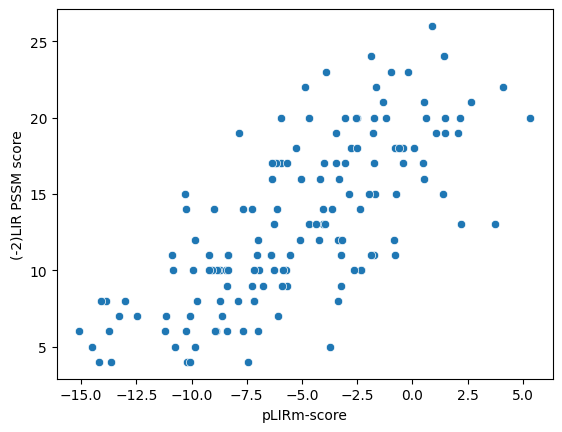

In [117]:
sns.scatterplot(x='pLIRm-score', y='(-2)LIR PSSM score', data=df[df['Grouped_Verified']==1])

<Axes: xlabel='pLIRm-score', ylabel='(-2)LIR PSSM score'>

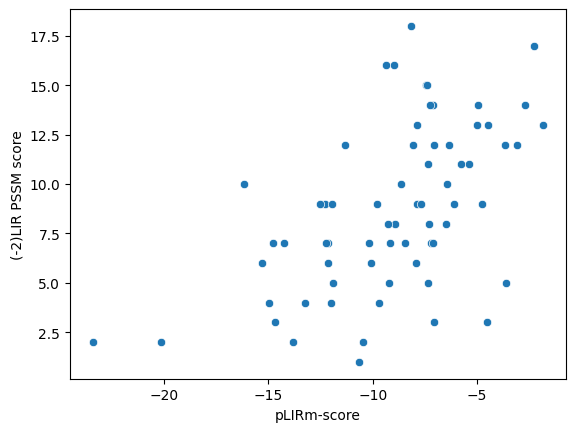

In [118]:
sns.scatterplot(x='pLIRm-score', y='(-2)LIR PSSM score', data=df[df['Grouped_Verified']==0])

<Axes: xlabel='pLIRm-score', ylabel='PSSM_LIRcentral-core'>

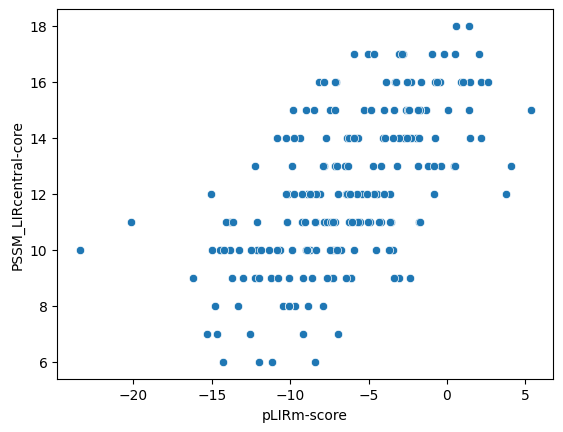

In [119]:
sns.scatterplot(x='pLIRm-score', y='PSSM_LIRcentral-core', data=df)

# Build a Stacking classifier ensemble using the pLIRm score as well

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [121]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['Grouped_Verified'] = label_encoder.fit_transform(df['Grouped_Verified'])


In [122]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler_w_pLIRm = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import joblib
joblib.dump(scaler_w_pLIRm, 'scaler_w_pLIRm.pkl')

['scaler_w_pLIRm.pkl']

In [123]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Multilayer Perceptron Classifier
mlp = MLPClassifier(random_state=42, max_iter=10000)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='accuracy')
mlp_grid.fit(X_train, y_train)

# Support Vector Machine Classifier
svm = SVC(probability=True, random_state=42)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [124]:
# Create and Train the Stacking Classifier
estimators = [
    ('rf', rf_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_),
    ('mlp', mlp_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_)
]



stacking_classifier_w_pLIRm = StackingClassifier(
    estimators=estimators,
    final_estimator=MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,10),
                                  activation='relu', alpha=0.001),
    cv=5
)
stacking_classifier_w_pLIRm.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=200,
                                                           random_state=42)),
                               ('lr',
                                LogisticRegression(C=1, max_iter=10000,
                                                   random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=10000, random_state=42)),
                               ('svm',
                                SVC(C=1, probability=True, random_state=42))],
                   final_estimator=MLPClassifier(alpha=0.001,
                                                 hidden_layer_sizes=(10, 10),
                                                 max_iter=1000))

In [125]:
# Evaluate the Stacking Classifier
y_pred = stacking_classifier_w_pLIRm.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()


# Self consistency test
y_self = stacking_classifier_w_pLIRm.predict(X_train)
print('Self Consistency Test')
print("Stacking Classifier Accuracy:", accuracy_score(y_train, y_self))
print(classification_report(y_train, y_self))

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_self))


Stacking Classifier Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.97      0.91      0.94        33

    accuracy                           0.91        43
   macro avg       0.86      0.90      0.88        43
weighted avg       0.92      0.91      0.91        43

Confusion Matrix:
[[ 9  1]
 [ 3 30]]

Self Consistency Test
Stacking Classifier Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00       113

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion Matrix:
[[ 57   0]
 [  0 113]]


In [126]:
import joblib
joblib.dump(stacking_classifier_w_pLIRm, 'stacking_classifier_w_pLIRm.pkl')

['stacking_classifier_w_pLIRm.pkl']

# Validate pLIRm score on this dataset

In [127]:
cutoffs ={
    'high':-4.01571870330455,
    'medium':-5.65378151344264,
    'low': -6.48177318790263
} # Based on the original publication

for cutoff in cutoffs:
  y_obs = []
  y_pred = []
  tp=fp=tn=fn=0
  threshold = cutoffs[cutoff]
  for index, row in df.iterrows():
    isfunctional = row['Grouped_Verified']
    y_obs.append(isfunctional)
    pLIRm_score=row['pLIRm-score']
    if(isfunctional==1):
      if(pLIRm_score>=threshold):
        y_pred.append(1)
        tp+=1
      else:
        y_pred.append(0)
        fn+=1
    else:
      if(pLIRm_score>=threshold):
        y_pred.append(1)
        fp+=1
      else:
        y_pred.append(0)
        tn+=1
  print()
  print('Cutoff: ', cutoff, tp, tn, fp, fn)
  print("pLIRm Accuracy:", accuracy_score(y_obs, y_pred))
  print(classification_report(y_obs, y_pred))

  print("Confusion Matrix:")
  print(confusion_matrix(y_obs, y_pred))



Cutoff:  high 62 61 6 84
pLIRm Accuracy: 0.5774647887323944
              precision    recall  f1-score   support

           0       0.42      0.91      0.58        67
           1       0.91      0.42      0.58       146

    accuracy                           0.58       213
   macro avg       0.67      0.67      0.58       213
weighted avg       0.76      0.58      0.58       213

Confusion Matrix:
[[61  6]
 [84 62]]

Cutoff:  medium 74 55 12 72
pLIRm Accuracy: 0.6056338028169014
              precision    recall  f1-score   support

           0       0.43      0.82      0.57        67
           1       0.86      0.51      0.64       146

    accuracy                           0.61       213
   macro avg       0.65      0.66      0.60       213
weighted avg       0.73      0.61      0.62       213

Confusion Matrix:
[[55 12]
 [72 74]]

Cutoff:  low 90 51 16 56
pLIRm Accuracy: 0.6619718309859155
              precision    recall  f1-score   support

           0       0.48      0.

In [ ]:
import os
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/iLIR-ML(AF2_newPSSM_pLIRm)"

In [ ]:
!ls -l "/content/drive/My Drive/iLIR-ML(AF2_newPSSM_pLIRm)"

total 7054
-rw------- 1 root root  581304 Jun 16 23:08 alphafold_disorder_predictions.csv
-rw------- 1 root root    1706 Jun 16 23:08 BLOSUM62R.txt
-rw------- 1 root root    2558 Jun 16 23:08 data_set.txt
-rw------- 1 root root 2181956 Jun 16 23:08 ensemble_classifier.pkl
-rw------- 1 root root   30313 Jun 16 23:08 LIRcentral-OnlyVerified-Canonical.csv
-rw------- 1 root root    4335 Jun 16 23:08 negative.pssm
-rw------- 1 root root    4335 Jun 16 23:08 positive.pssm
-rw------- 1 root root 2203628 Jun 16 23:08 stacking_classifier.pkl
-rw------- 1 root root 2202748 Jun 16 23:08 stacking_classifier_w_pLIRm.pkl
-rw------- 1 root root    7860 Jun 16 23:08 trained_model.txt


In [128]:
!ls -1
!cp *.csv *.txt *.pssm *pkl "/content/drive/My Drive/iLIR-ML(AF2_newPSSM_pLIRm)"

alphafold_disorder_predictions.csv
BLOSUM62R.txt
data_set.txt
drive
ensemble_classifier_AFdis_pssm_newPSSMs.pkl
ensemble_scaler_AFdis_pssm_newPSSMs.pkl
LIRcentral-OnlyVerified-Canonical.csv
negative.pssm
positive.pssm
scaler_w_pLIRm.pkl
stacking_classifier_AFdis_pssm_newPSSMs.pkl
stacking_classifier_w_pLIRm.pkl
stacking_scaler_AFdis_pssm_newPSSMs.pkl
trained_model.txt
